<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/43_Statsmodels_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving airline_passengers.csv to airline_passengers.csv


{'airline_passengers.csv': b'"Month","Thousands of Passengers"\n"1949-01",112\n"1949-02",118\n"1949-03",132\n"1949-04",129\n"1949-05",121\n"1949-06",135\n"1949-07",148\n"1949-08",148\n"1949-09",136\n"1949-10",119\n"1949-11",104\n"1949-12",118\n"1950-01",115\n"1950-02",126\n"1950-03",141\n"1950-04",135\n"1950-05",125\n"1950-06",149\n"1950-07",170\n"1950-08",170\n"1950-09",158\n"1950-10",133\n"1950-11",114\n"1950-12",140\n"1951-01",145\n"1951-02",150\n"1951-03",178\n"1951-04",163\n"1951-05",172\n"1951-06",178\n"1951-07",199\n"1951-08",199\n"1951-09",184\n"1951-10",162\n"1951-11",146\n"1951-12",166\n"1952-01",171\n"1952-02",180\n"1952-03",193\n"1952-04",181\n"1952-05",183\n"1952-06",218\n"1952-07",230\n"1952-08",242\n"1952-09",209\n"1952-10",191\n"1952-11",172\n"1952-12",194\n"1953-01",196\n"1953-02",196\n"1953-03",236\n"1953-04",235\n"1953-05",229\n"1953-06",243\n"1953-07",264\n"1953-08",272\n"1953-09",237\n"1953-10",211\n"1953-11",180\n"1953-12",201\n"1954-01",204\n"1954-02",188\n"1954-

In [ ]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.index = pd.to_datetime(airline.index)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [ ]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

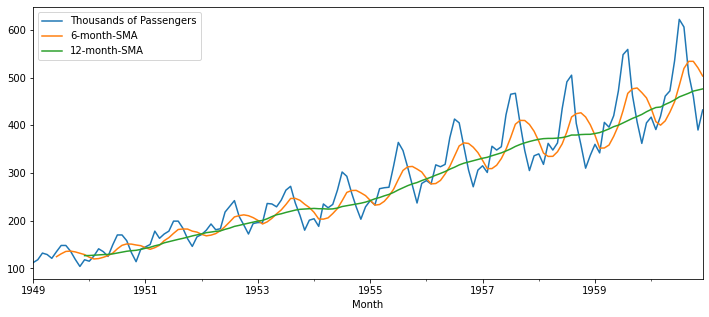

In [ ]:
airline.plot(figsize=(12, 5))

In [ ]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

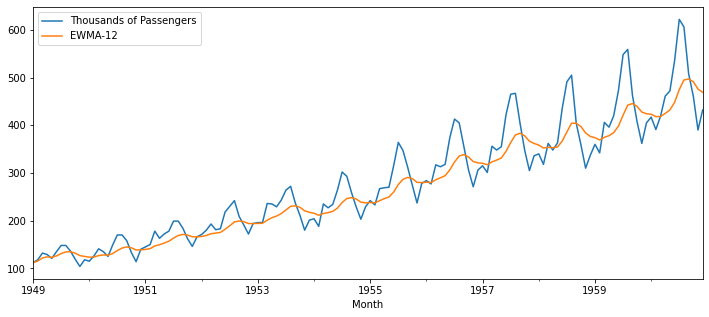

In [ ]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12, 5))